In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos los datos
datos = pd.read_csv("C:/Users/PC/Documents/Ceb_512/proyectos/desempeno_academico_ceb_512/factores_desempeno_academico.csv")

In [3]:
#Observamos los nombres de las columnas y las 5 primeras observaciones
datos.head()

,Marca temporal,1. Edad:,2. Sexo:,3. Grado:,4. ¿Tienes claro qué vas a hacer después de salir de la prepa?,4.2 ¿Qué piensas hacer después de la preparatoria?,5. Tu promedio del semestre pasado fue de:,6. ¿Cómo es el lugar donde vives?,7. ¿En qué tipo de familia vives?,8. ¿Cuál es la escolaridad de tus padres o tutores?,9. ¿Supervisan tus tareas escolares o recibes apoyo para realizarlas en casa?,10. ¿Reprobaste una o varias materias el semestre pasado?,11. ¿Cuántas materias reprobaste?,12. ¿Cuál crees qué es la causa principal de que hayas reprobado?,13. Piensas que aprobar una R es:
0,28/03/2023 10:26:12,15,Mujer,1ro,"Sí, muy claro",Estudiar,9 a 10,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No,NaN,NaN,NaN
1,28/03/2023 10:27:44,15,Mujer,1ro,"Sí, muy claro",Estudiar,7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si,1 a 2,No trabajé o no me esforcé lo suficiente,Regular
2,28/03/2023 10:28:55,15,Hombre,1ro,"Sí, muy claro",Trabajar,6 a 6.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si,3 a 4,No trabajé o no me esforcé lo suficiente,Mas o menos fácil
3,28/03/2023 10:29:00,15,Mujer,1ro,"Sí, muy claro",Estudiar,7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,Regularmente,Si,1 a 2,No trabajé o no me esforcé lo suficiente,Mas o menos fácil
4,28/03/2023 10:29:16,15,Mujer,1ro,"Sí, muy claro",Estudiar,6 a 6.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Siempre,Si,1 a 2,Otra,Mas o menos fácil


In [4]:
#Obtenemos información sobre el conjunto de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 15 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Marca temporal                                                                 318 non-null    object
 1   1. Edad:                                                                       318 non-null    int64 
 2   2. Sexo:                                                                       318 non-null    object
 3   3. Grado:                                                                      318 non-null    object
 4   4. ¿Tienes claro qué vas a hacer después de salir de la prepa?                 318 non-null    object
 5   4.2 ¿Qué piensas hacer después de la preparatoria?                             292 non-null    object
 6   5. Tu promedio del semestre pasado

In [5]:
#Eliminamos las columnas que no se utilizarán en el estudio
datos = datos.drop("Marca temporal", axis= 1)
datos = datos.drop("4.2 ¿Qué piensas hacer después de la preparatoria?", axis= 1)
datos = datos.drop("11. ¿Cuántas materias reprobaste?", axis = 1)
datos = datos.drop("12. ¿Cuál crees qué es la causa principal de que hayas reprobado?", axis = 1)
datos = datos.drop("13. Piensas que aprobar una R es:", axis = 1)

In [6]:
#Verificamos la eliminación de las columnas
datos.head(3)

,1. Edad:,2. Sexo:,3. Grado:,4. ¿Tienes claro qué vas a hacer después de salir de la prepa?,5. Tu promedio del semestre pasado fue de:,6. ¿Cómo es el lugar donde vives?,7. ¿En qué tipo de familia vives?,8. ¿Cuál es la escolaridad de tus padres o tutores?,9. ¿Supervisan tus tareas escolares o recibes apoyo para realizarlas en casa?,10. ¿Reprobaste una o varias materias el semestre pasado?
0,15,Mujer,1ro,"Sí, muy claro",9 a 10,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,Mujer,1ro,"Sí, muy claro",7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si
2,15,Hombre,1ro,"Sí, muy claro",6 a 6.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si


In [7]:
# Accedemos a los nombres de las columnas para transformarlas
cols = datos.columns.values
cols

array(['1. Edad:', '2. Sexo:', '3. Grado:',
       '4. ¿Tienes claro qué vas a hacer después de salir de la prepa?',
       '5. Tu promedio del semestre pasado fue de:',
       '6. ¿Cómo es el lugar donde vives?',
       '7. ¿En qué tipo de familia vives?',
       '8. ¿Cuál es la escolaridad de tus padres o tutores?',
       '9. ¿Supervisan tus tareas escolares o recibes apoyo para realizarlas en casa?',
       '10. ¿Reprobaste una o varias materias el semestre pasado?'],
      dtype=object)

In [8]:
cols[0]

'1. Edad:'

In [9]:
datos.shape

(318, 10)

In [10]:
#Transformamos los nombres de las columnas
columnas = ["edad", "sexo", "grado", "expectativas", "promedio", "residencia", "tipo_familia", 
            "escolaridad_tutores", "supervision_hogar", "reprobado", "cant_reprobadas", "causa_reprobacion", "dificultad_rs"]
x = 0
for i in datos:
    datos = datos.rename(columns={i:columnas[x]})
    x+=1

datos.head(2)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,Mujer,1ro,"Sí, muy claro",9 a 10,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,Mujer,1ro,"Sí, muy claro",7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si


### Codificamos las observaciones de cada variable a fin de que los datos sean legibles para el algoritmo al momento de modelar.

In [11]:
#Creamos una función que nos ayude a transformar los datos, proporcionando: nombre de la variable a transformar, los valores
# actuales de la variable y el número de inicio de los valores a codificar.
def transformar_variables(variable, lista_valores_var, valor_inicio):
    n = valor_inicio
    for elem in lista_valores_var:
        datos[variable] = datos[variable].mask(datos[variable] == elem, n)
        n += 1

### Se codifica la variable "sexo"

In [12]:
#Se codifican los valores de la variable "sexo"; mujer = 1 y hombre = 0
# Se obtienen primeramente los valores únicos de la variable.
datos["sexo"].unique()

array(['Mujer', 'Hombre'], dtype=object)

In [13]:
lista_sexo = ['Hombre', 'Mujer']

In [14]:
transformar_variables("sexo", lista_sexo, 0)

In [15]:
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1ro,"Sí, muy claro",9 a 10,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,1,1ro,"Sí, muy claro",7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si
2,15,0,1ro,"Sí, muy claro",6 a 6.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si


### Se codifica la variable "grado"

In [16]:
#Se codifican los valores de la variable "grado", 1ro = 1, 2do = 2, 3ro = 3
#Se obtienen los valores únicos de la variable
datos["grado"].unique()

array(['1ro', '2do', '3ro'], dtype=object)

In [17]:
lista_grado = ['1ro', '2do', '3ro']

In [18]:
transformar_variables("grado", lista_grado, 1)

In [19]:
# Verificamos la tranformación
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,"Sí, muy claro",9 a 10,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,1,1,"Sí, muy claro",7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si
2,15,0,1,"Sí, muy claro",6 a 6.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si


### Se codifica la variable "expectativas"

In [20]:
#Se obtienen los valores únicos de la variable
datos["expectativas"].unique()

array(['Sí, muy claro', 'No muy seguro', 'Si, más o menos', 'No lo se'],
      dtype=object)

In [21]:
#Se ordenan en una lista para transformarlos
lista_expectativas = ['No lo se', 'No muy seguro', 'Si, más o menos', 'Sí, muy claro']

In [22]:
#Lista de los valores de la variable expectativas, se codifican a: 1, 2, 3 y 4, respectivamente.
transformar_variables("expectativas", lista_expectativas, 1)

In [23]:
#Verificamos la transformación
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,9 a 10,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,1,1,4,7 a 7.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si
2,15,0,1,4,6 a 6.9,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si


### La variable "promedio" se codifica de forma binaria señalando el "alto" y "bajo" desempeño.

In [24]:
datos["promedio"].unique()

array(['9 a 10', '7 a 7.9', '6 a 6.9', '8 a 8.9', '5 a 5.9'], dtype=object)

In [25]:
#Si el valor de la variable promedio es 8 o mayor se codifica como 1, en caso de que sea menor se codifica como 0.
lista_promedio = ['5 a 5.9', '6 a 6.9', '7 a 7.9', '8 a 8.9', '9 a 10']

In [26]:
for i in lista_promedio:
    if (i == '9 a 10') or (i == '8 a 8.9'):
        datos["promedio"] = datos["promedio"].mask(datos["promedio"] == i, 1)
    else:
        datos["promedio"] = datos["promedio"].mask(datos["promedio"] == i, 0)

In [27]:
#Verificamos la transformación
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,1,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,1,1,4,0,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si
2,15,0,1,4,0,Comunidad Rural,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si


### La varibale "residencia" se codifica en forma binaria

In [28]:
#Obtenemos los valores únicos de la variable residencia
datos["residencia"].unique()

array(['Comunidad Rural', 'Colonia'], dtype=object)

In [29]:
lista_residencia = ['Comunidad Rural', 'Colonia']

In [30]:
# Los valores se transforman de la siguiente manera: "Comunidad Rural" = 0 y "Colonia" = 1
transformar_variables("residencia", lista_residencia, 0)

In [31]:
#Verificamos la transformación
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,1,0,"Tradicional (biparental, vives con tus dos pad...",Secundaria,Regularmente,No
1,15,1,1,4,0,0,"Tradicional (biparental, vives con tus dos pad...",Bachillerato,A veces,Si
2,15,0,1,4,0,0,"Tradicional (biparental, vives con tus dos pad...",Sin estudios,Siempre,Si


### Codificamos la variable "tipo_familia"

In [32]:
#Obtenemos los valores únicos de la variable
datos["tipo_familia"].unique()

array(['Tradicional (biparental, vives con tus dos padres)', 'Otra',
       'Extendida (vives con abuelos o tíos)',
       'Uniparental (vives con uno de tus padres)'], dtype=object)

In [33]:
#Ordenamos los valores de la variable en una lista para transformarlos.
lista_tipo_fam = ['Otra', 'Extendida (vives con abuelos o tíos)', 'Uniparental (vives con uno de tus padres)', 
                  'Tradicional (biparental, vives con tus dos padres)']

In [34]:
#Los valores se transforman de la siguiente manera: Otra = 1, Extendida = 2, Uniparental = 3, Tradicional = 4.
transformar_variables("tipo_familia", lista_tipo_fam, 1)

In [35]:
#Verificamos
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,1,0,4,Secundaria,Regularmente,No
1,15,1,1,4,0,0,4,Bachillerato,A veces,Si
2,15,0,1,4,0,0,4,Sin estudios,Siempre,Si


### Codificamos la variable "escolaridad_tutores"

In [36]:
#Obtenemos los valores únicos de la variable. 
datos["escolaridad_tutores"].unique()

array(['Secundaria', 'Bachillerato', 'Sin estudios', 'Universidad',
       'Posgrado', 'Primaria'], dtype=object)

In [37]:
#Ordenamos los valores para transformarlos.
lista_escolaridad_tut = ['Sin estudios', 'Primaria', 'Secundaria', 'Bachillerato', 'Universidad', 'Posgrado']

In [38]:
# Los valores se transforman de la siguiente manera: Sin estudios = 0, Primaria = 1, Secundaria = 2, etc...
transformar_variables("escolaridad_tutores", lista_escolaridad_tut, 0)

In [39]:
# Verificamos
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,1,0,4,2,Regularmente,No
1,15,1,1,4,0,0,4,3,A veces,Si
2,15,0,1,4,0,0,4,0,Siempre,Si


### Codificamos la variable "supervision_hogar"

In [40]:
#Obtenemos los valores únicos
datos["supervision_hogar"].unique()

array(['Regularmente', 'A veces', 'Siempre', 'Nunca'], dtype=object)

In [41]:
#Los ordenamos en una lista
lista_supervision = ['Nunca', 'A veces', 'Regularmente', 'Siempre']

In [42]:
# Los valores se transforman de la siguiente manera: Nunca = 1, A veces = 2, Regularmente = 3, Siempre = 4.
transformar_variables("supervision_hogar", lista_supervision, 1)

In [43]:
#Verificamos
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,1,0,4,2,3,No
1,15,1,1,4,0,0,4,3,2,Si
2,15,0,1,4,0,0,4,0,4,Si


### Codificamos la variable "reprobado"

In [44]:
#Obtenemos los valores únicos
datos["reprobado"].unique()

array(['No', 'Si'], dtype=object)

In [45]:
#Los ordenamos (en este caso ya están ordenados)
lista_reprobado = ['No', 'Si']

In [46]:
#Los valores se transforman de la siguiente manera: No = 0 y Si = 1
transformar_variables("reprobado", lista_reprobado, 0)

In [47]:
#Verificamos
datos.head(3)

,edad,sexo,grado,expectativas,promedio,residencia,tipo_familia,escolaridad_tutores,supervision_hogar,reprobado
0,15,1,1,4,1,0,4,2,3,0
1,15,1,1,4,0,0,4,3,2,1
2,15,0,1,4,0,0,4,0,4,1


### Preparamos los datos para el modelado

In [48]:
#Obtenemos información sobre el tipo de dato de cada variable
datos.dtypes

edad                    int64
sexo                   object
grado                  object
expectativas           object
promedio               object
residencia             object
tipo_familia           object
escolaridad_tutores    object
supervision_hogar      object
reprobado              object
dtype: object

In [49]:
#Accedemos a los nombres de las columnas y las guardamos en una variable
columnas = datos.columns.values
columnas

array(['edad', 'sexo', 'grado', 'expectativas', 'promedio', 'residencia',
       'tipo_familia', 'escolaridad_tutores', 'supervision_hogar',
       'reprobado'], dtype=object)

In [50]:
#Recorremos el array "columnas" para cambiar el tipo de dato de cada columna, o variable, a tipo "int"
for col in columnas:
    datos[col] = datos[col].astype(int)

In [51]:
#Verificamos la transformación
datos.dtypes

edad                   int32
sexo                   int32
grado                  int32
expectativas           int32
promedio               int32
residencia             int32
tipo_familia           int32
escolaridad_tutores    int32
supervision_hogar      int32
reprobado              int32
dtype: object

### Modelado

In [52]:
#Importamos la función SelectKBest y chi2 para seleccionar las variables con mayor dependencia estadística con la 
#variable objetivo
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
#Importamos las bibliotecas y paquetes para el modelado y la optimización de hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [54]:
#Seleccionamos las variables independientes o explicativas
X = datos[['edad', 'sexo', 'grado', 'expectativas', 'residencia', 'tipo_familia', 'escolaridad_tutores', 'supervision_hogar']]

In [55]:
#Seleccionamos las variable dependiente o explicada
y = datos["promedio"]

In [56]:
X.head()

,edad,sexo,grado,expectativas,residencia,tipo_familia,escolaridad_tutores,supervision_hogar
0,15,1,1,4,0,4,2,3
1,15,1,1,4,0,4,3,2
2,15,0,1,4,0,4,0,4
3,15,1,1,4,0,4,3,3
4,15,1,1,4,0,4,2,4


In [57]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: promedio, dtype: int32

### Modelo con todas las variables y con optimización de hiperparámetros (GridSearchCV)

In [58]:
#Instanciamos el modelo de clasificación en este caso "DecisionTreeClassifier()"
estimator = DecisionTreeClassifier()

In [59]:
# Establecemos el "param_grid" o rejilla de parámetros para la búsqueda exhaustiva (GridSearchCV).
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [1, 2, 3, 4, 5, 7, 9],
              "min_samples_split": range(2, 11, 2),
             "min_samples_leaf": [1, 2, 3, 4, 5]}

In [60]:
# Instanciamos la búsqueda exhaustiva (GridSearchCV), con el estimador establecido, el param_grid establecido y otros parámetros
# por defecto.
gs = GridSearchCV(estimator = estimator,
                 param_grid = param_grid,
                 scoring = None,
                 refit = True,
                 cv = None)

In [61]:
# Ejecutamos el ajuste a los datos 
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(2, 11, 2)})

In [62]:
#Observamos en un dataframe, los resultados para cada combinación de hiperparámetros
df_resultados = pd.DataFrame(gs.cv_results_)
df_resultados.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002621,0.000792,0.001400,0.000492,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.515625,0.390625,0.65625,0.634921,0.634921,0.566468,0.100934,106
1,0.001798,0.000730,0.001201,0.000391,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.515625,0.390625,0.65625,0.634921,0.634921,0.566468,0.100934,106
2,0.001611,0.000482,0.000989,0.000016,gini,1,1,6,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.515625,0.390625,0.65625,0.634921,0.634921,0.566468,0.100934,106


In [63]:
# El mejor "score" obtenido para cierta combinación de hiperparámetros
df_resultados["mean_test_score"].max()

0.6011904761904762

In [64]:
# Ordenamos los resultados de la cmbinación de hiperparámetros de acuerdo a la columna "mean_test_score".
df = df_resultados.sort_values('mean_test_score', ascending=False)
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
162,0.001616,0.000503,0.000985,0.000030,gini,9,3,6,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.546875,0.53125,0.546875,0.746032,0.634921,0.601190,0.081128,1
136,0.001199,0.000402,0.001001,0.000002,gini,7,3,4,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.531250,0.59375,0.531250,0.714286,0.634921,0.601091,0.068945,2
138,0.001198,0.000399,0.000999,0.000003,gini,7,3,8,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.546875,0.59375,0.531250,0.698413,0.634921,0.601042,0.060806,3


In [65]:
# Obtenemos los mejores parámetros para este modelo, con todas las variables
gs.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [66]:
# En esta celda se puede observar la importancia asignada a cada una de las variables
gs.best_estimator_.feature_importances_

array([0.10674665, 0.12504886, 0.09271137, 0.14177764, 0.09103167,
       0.08627577, 0.1958403 , 0.16056775])

In [67]:
# El mejor "score" obtenido por la búsqueda exhaustiva, se confirma el resultado anterior.
gs.best_score_

0.6011904761904762

### Obtención de las 5 variables más importantes

In [68]:
# Seleccionamos las 5 variables con mayor dependencia estadística según el test Chi2, y la guardamos en X1
X1 = SelectKBest(chi2, k=5).fit_transform(X, y)

In [69]:
type(X1)

numpy.ndarray

In [70]:
X1[0:10]

array([[1, 1, 4, 2, 3],
       [1, 1, 4, 3, 2],
       [0, 1, 4, 0, 4],
       [1, 1, 4, 3, 3],
       [1, 1, 4, 2, 4],
       [1, 1, 2, 4, 2],
       [1, 1, 4, 2, 2],
       [0, 1, 4, 4, 3],
       [0, 1, 3, 3, 2],
       [0, 1, 4, 4, 4]])

In [71]:
# Para obtener los nombres de las variables, lo hacemos por medio de un selector
selector = SelectKBest(chi2, k= 5)

In [72]:
X1 = selector.fit_transform(X, y)

In [73]:
# Con el método "get_support()" obtenemos un array de valores booleanos, con los índices de las variables aceptadas y rechazadas
mask = selector.get_support()
mask

array([False,  True,  True,  True, False, False,  True,  True])

In [74]:
# Obtenemos los nombres originales de las variables de X
cols = X.columns.values
cols

array(['edad', 'sexo', 'grado', 'expectativas', 'residencia',
       'tipo_familia', 'escolaridad_tutores', 'supervision_hogar'],
      dtype=object)

In [75]:
# Obtenemos los "scores" de cada variable según el test de Chi2 para seleccionarlas
sel_scores = selector.scores_
sel_scores

array([0.06767611, 6.90703453, 3.2400867 , 0.35369579, 0.01178653,
       0.10518624, 0.21391293, 0.16164411])

In [76]:
selected_features = pd.DataFrame(
{
    "varibales": cols,
    "seleccionada": mask,
    "score": sel_scores
}
)

In [77]:
selected_features

,varibales,seleccionada,score
0,edad,False,0.067676
1,sexo,True,6.907035
2,grado,True,3.240087
3,expectativas,True,0.353696
4,residencia,False,0.011787
5,tipo_familia,False,0.105186
6,escolaridad_tutores,True,0.213913
7,supervision_hogar,True,0.161644


### Modelo con las 5 variables más importantes y GridSearchCV

In [78]:
# Creamos X, donde guardamos las 5 variables seleccionadas
X = datos[['sexo', 'grado', 'expectativas', 'escolaridad_tutores', 'supervision_hogar']]

In [79]:
# Instanciamos el estimador
estimator = DecisionTreeClassifier()

In [80]:
# Establecemos el "param_grid" o rejilla de parámetros para la búsqueda exhaustiva (GridSearchCV).
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [1, 2, 3, 4, 5, 7, 9],
              "min_samples_split": range(2, 11, 2),
             "min_samples_leaf": [1, 2, 3, 4, 5]}

In [81]:
# Instanciamos la búsqueda exhaustiva (GridSearchCV), con el estimador establecido, el param_grid establecido y otros parámetros
# por defecto.
gs = GridSearchCV(estimator = estimator,
                 param_grid = param_grid,
                 scoring = None,
                 refit = True,
                 cv = None)

In [82]:
# Ejecutamos el ajuste a los datos 
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(2, 11, 2)})

In [83]:
# Revisamos los mejores parámetros seleccionados
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [84]:
# La importancia de las variables con el mejor estimador obtenido
gs.best_estimator_.feature_importances_

array([0.16706771, 0.19980004, 0.23945749, 0.2571617 , 0.13651306])

In [85]:
# El mejor "score" obenido
gs.best_score_

0.638343253968254

In [86]:
# Guardamos el modelo entrenado en una variable
modelo_de = gs.best_estimator_

### Predicciones

In [87]:
# Usamos el modelo entrenado para realizar predicciones de la variable objetivo
y_pred = modelo_de.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [88]:
# Realizamos predicciones de la probabilidad de cada etiqueta
proba = modelo_de.predict_proba(X)
proba[0:10]

array([[0.8       , 0.2       ],
       [0.75      , 0.25      ],
       [0.71428571, 0.28571429],
       [0.66666667, 0.33333333],
       [0.8       , 0.2       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.33333333, 0.66666667],
       [0.56521739, 0.43478261],
       [0.33333333, 0.66666667]])

In [89]:
# DataFrame de las predicciones
df_proba = pd.DataFrame(proba, columns= ["prob_0", "prob_1"])
df_proba.head()

,prob_0,prob_1
0,0.800000,0.200000
1,0.750000,0.250000
2,0.714286,0.285714
3,0.666667,0.333333
4,0.800000,0.200000


In [90]:
# Generamos un DataFrame con la "y verdadera", la "y predicha" y las probabilidades.
df_pred = pd.DataFrame({
    "y_true": y,
    "y_pred": y_pred,
    "prob_0": df_proba["prob_0"],
    "prob_1": df_proba["prob_1"]
})

In [91]:
df_pred.head(10)

,y_true,y_pred,prob_0,prob_1
0,1,0,0.800000,0.200000
1,0,0,0.750000,0.250000
2,0,0,0.714286,0.285714
3,0,0,0.666667,0.333333
4,0,0,0.800000,0.200000
5,0,0,0.500000,0.500000
6,1,0,0.500000,0.500000
7,1,1,0.333333,0.666667
8,1,0,0.565217,0.434783
9,1,1,0.333333,0.666667


### Métricas de desempeño del modelo

In [92]:
# Importamos los paquetes para calcular la matriz de confusión y la prueba de precisión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [93]:
cm = confusion_matrix(y, y_pred)
cm

array([[ 92,  45],
       [ 39, 142]], dtype=int64)

La Matriz de Confusión arroja 93 verdaderos negativos (TN), 141 verdaderos positivos (TP), 40 falsos negativos (FN) y 44 falsos
positivos (FP), para una precisión general de 73.6%.

In [94]:
# Verificamos la precisión del modelo con el método "score"
modelo_de.score(X, y)

0.7358490566037735

In [95]:
# Corroboramos con la función accuracy_score
accuracy_score(y, y_pred, normalize=True)

0.7358490566037735

In [96]:
# Obtenemos la cantidad de etiquetas asignadas correctamente
accuracy_score(y, y_pred, normalize=False)

234

### Esquema del modelo de Árbol generado

In [99]:
# Importamos los módulos necesarios para dibujar el modelo de árbol generado con el mejor estimador
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [100]:
# También importamos la función para visualizar la imagen generada
from IPython.display import Image

In [101]:
# Establecemos los parámetros con los que se construirá la imagen del árbol y lo guardamos en la variable "data"
data = tree.export_graphviz(gs.best_estimator_,
                           out_file = None,
                           feature_names = ['sexo', 'grado', 'expectativas', 'escolaridad_tutores', 'supervision_hogar'],
                           class_names = ['Bajo', 'Alto'],
                           filled = True,
                           rounded = True,
                           special_characters = True)

In [102]:
# Creamos un objeto gráfico a partir de los datos en formato DOT.
graph = graph_from_dot_data(data)

In [103]:
# Exportamos la imagen generada con la función write
graph.write_jpg('C:/Users/PC/Documents/Ceb_512/proyectos/desempeno_academico_ceb_512/tree_desempeno_5V.jpg')

True

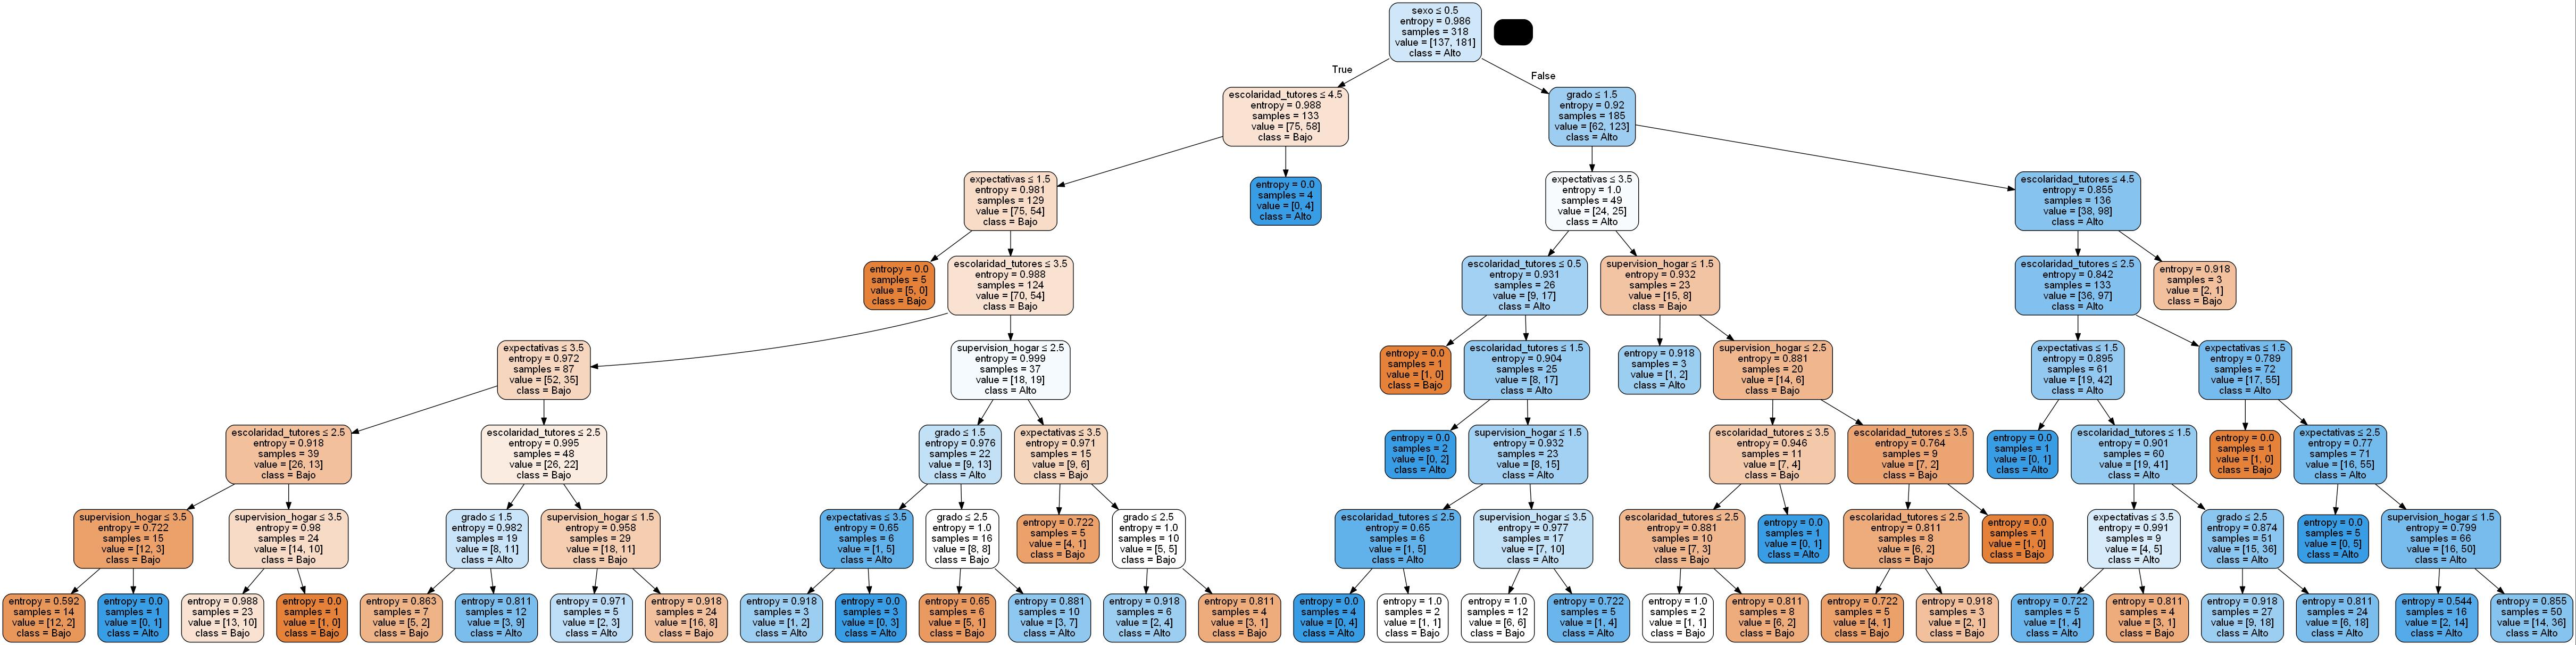

In [104]:
# Visualizamos la imagen
Image(filename="C:/Users/PC/Documents/Ceb_512/proyectos/desempeno_academico_ceb_512/tree_desempeno_5V.jpg")

En esta imagen se puede observar el mecanismo de clasificación llevado a cabo por el modelo de árbol de decisión generado.